<h1 style="text-align:center"> NYC Open Data Week at TIQC</h1>
<h2 style="text-align:center"> Data Visualization in Python</h2>

<img src="https://cdn.pixabay.com/photo/2016/08/02/18/27/statistic-1564428_1280.png" width="300" align="center" >

Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.<br>

Python offers multiple great graphing libraries that come packed with lots of different features. No matter if you want to create interactive, live or highly customized plots python has an excellent library for you.<br>
To get a little overview here are a few popular plotting libraries:<br>
<b>Matplotlib: </b>low level, provides lots of freedom<br>
<b>Pandas:</b> used for data analysis, reading and manipulating data<br>
<b>Seaborn:</b> high-level interface, great default styles<br>
<b>ggplot:</b> based on R’s ggplot2, uses Grammar of Graphics<br>
<b>Plotly:</b> can create interactive plots<br>

Source: <a href =https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed>Introduction to Data Visualization in Python</a>

# Table of Contents

<div class = "alert alert-info">

1. [Importing Libraries  and Open NYC Data](#1)<br>
    
2. [Single Variable Visualization](#2)<br>
    2.1 [Categorical Variables](#2.1)<br>
    2.1.1 [Bar Graphs](#2.1.1)<br>
    2.1.2 [Horizontal Bar Graphs](#2.1.2)<br>
    2.1.3 [Pie Charts](#2.1.3)<br>
    2.2 [Numerical Variables](#2.2)<br>
    2.2.1 [Histograms](#2.2.1)<br>
    2.2.2 [Density Plots](#2.2.2)<br>
    
3. [Two or More Variables Visualization](#3) <br>
    3.1 [Categorical Variables](#3.1)<br>
    3.1.1 [Side by Side Graphs](#3.1.1)<br>
    3.2 [Numerical Variables](#3.2)<br>
    3.2.1 [Scatter Plot](#3.2.1)<br>
    3.2.2 [Time Series](#3.2.2)<br>
    3.3 [Categorical & Numerical Variables](#3.3)<br>
    3.3.1 [Faceting](#3.3.1)<br>
    3.3.2 [Stacking & Overlapping](#3.3.2)<br>
  

</div>
<hr>

## Importing Libraries and Open NYC Data<a id=1></a>
The first thing we do when creating visualizations is import the necessary packages and read in the dataset we will be working with.

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in data
Fire2018 = pd.read_csv('2018 Fire Incident Data.csv', header=0) 

In [3]:
# Cleaning data
# Filter for Valid Responses Only
Fire2018 = Fire2018[(Fire2018.VALID_INCIDENT_RSPNS_TIME_INDC =='Y')]



Fire2018= Fire2018.rename(columns={'ZIPCODE': 'Zip', 'INCIDENT_RESPONSE_SECONDS_QY': 'ResponseTime',
                         'INCIDENT_CLASSIFICATION_GROUP': 'IncidentType', 'INCIDENT_BOROUGH': 'Borough',
                                  'INCIDENT_DATETIME': 'Date',
                                  'ALARM_BOX_LOCATION' : 'Neighborhood'})

# The "floor" method normalizes the DateTimes to a certain frequency.
# A frequency of days ("d") removes the Time component without
# converting the DateTime back to a String.
Fire2018['Date'] = pd.to_datetime(Fire2018.Date).dt.floor("d")

Fire2018.head()

,STARFIRE_INCIDENT_ID,Date,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,Neighborhood,Borough,Zip,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,ResponseTime,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,1800111510150000,2018-01-01,QUEENS,1151,BAY 28 ST & SUNNYSIDE ST,QUEENS,11691,101,31.0,414.0,...,01/01/2018 12:03:41 AM,01/01/2018 12:07:55 AM,01/01/2018 12:15:08 AM,N,Y,350,280,1,1,0
1,1800197070150000,2018-01-01,QUEENS,9707,75 AVE & 178 ST,QUEENS,11366,107,24.0,408.0,...,01/01/2018 12:03:58 AM,01/01/2018 12:07:15 AM,01/01/2018 12:10:32 AM,N,Y,261,204,1,1,0
2,1800137760240000,2018-01-01,BROOKLYN,3776,CHURCH AVE & STORY ST,BROOKLYN,11218,66,39.0,312.0,...,01/01/2018 12:04:56 AM,01/01/2018 12:08:00 AM,01/01/2018 12:10:40 AM,N,Y,247,205,1,0,0
3,1800152100150000,2018-01-01,QUEENS,5210,LINDEN BLVD & 121 ST,QUEENS,11420,106,28.0,410.0,...,01/01/2018 12:14:25 AM,01/01/2018 12:16:26 AM,01/01/2018 12:21:10 AM,N,Y,160,141,3,2,1
4,1800131730120010,2018-01-01,BRONX,3173,CROTONA AVE & 182 ST,BRONX,10457,48,15.0,206.0,...,01/01/2018 12:14:59 AM,01/01/2018 12:17:14 AM,01/01/2018 12:26:54 AM,N,Y,174,160,3,2,1


## Single Variable Visualization <a id=2></a>

There are two types of variables we can visualize: **categorical** and **numerical** variables. 


**Categorical** variables are not numbers. They are variables such as sex(male/female), education level(HS/College/Graudate Degree), zipcode("11360","11428","90210"), or country names("Colombia","Brazil","Guyana","U.S","U.A.E"). 

**Numerical** variables are numbers. They are variables such as population size, age, or number of teams.

### Categorical Variables <a id=2.1></a>

### Bar Graphs<a id=2.1.1></a>
Bar graphs are useful for visualizing single variables. We can use these to visualize the count of each category in a variable. 

There are different variations of bar graphs including: **horizontal bar graphs, lollipop and dot plots**.

Let's visualize the number of fires per borough from our dataset. First, we are going to create a new dataframe with just the borough variable from our Fire2018 dataframe. Once we pull out the variable of interest we will count the number of occurrences of each borough to get the number of fires per borough. 

In [4]:
# Creating new df with variable of interest
boroughs = Fire2018[['Borough']]
boroughs.head()

,Borough
0,QUEENS
1,QUEENS
2,BROOKLYN
3,QUEENS
4,BRONX


In [5]:
# Getting the count of each borough
Bcount = boroughs.groupby(["Borough"])["Borough"].agg('count').to_frame('Count').reset_index()
Bcount

,Borough,Count
0,BRONX,7645
1,BROOKLYN,11844
2,MANHATTAN,8244
3,QUEENS,7713
4,RICHMOND / STATEN ISLAND,1822


In [6]:
# Sorting the df by ascending value to ensure our visualization is sorted correctly
# When creating bar graphs it is important to make sure they are sorted
Bcount = Bcount.sort_values("Count", ascending = True)    
Bcount

,Borough,Count
4,RICHMOND / STATEN ISLAND,1822
0,BRONX,7645
3,QUEENS,7713
2,MANHATTAN,8244
1,BROOKLYN,11844


#### Creating the bar graph

[Text(0.5, 0, 'Borough Name'),
 Text(0, 0.5, '# of Fires'),
 Text(0.5, 1.0, '# of Fires per Borough')]

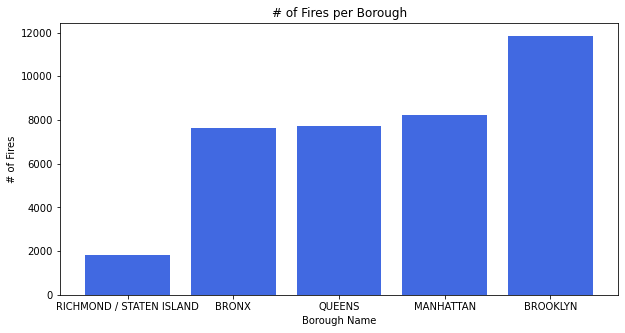

In [7]:
fig, ax = plt.subplots(figsize=(10,5))       

ax.bar(x = Bcount.Borough, height = Bcount.Count,
      color = "royalblue")  

ax.set(xlabel = 'Borough Name',
      ylabel = '# of Fires',
      title = '# of Fires per Borough')

### Horizontal Bar Graph<a id=2.1.2></a>

A variation of a standard bar graph is the horizontal bar graph. This variation is often helpful when the category names are long so they do not overlap on the x-axis, rather it is given ample space on the y-axis so it is easier to read. Horizontal bar graphs are also good to use when the bars are of similar length, it makes it a bit easier to distinguish the length differences.

When the bars are similar in length, it can also be beneficial to create a lollipop or dot plot.

#### Creating the horizontal bar plot

<Figure size 1382.4x777.6 with 0 Axes>

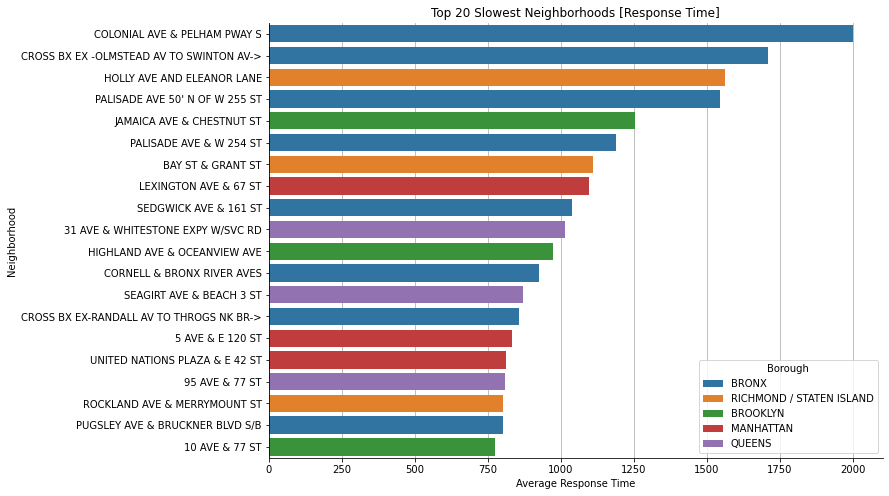

In [8]:
#first group by neighborhood & compute mean response time for each area
nhood = Fire2018.groupby(['Neighborhood','Borough'])['ResponseTime'].mean().reset_index()

#next filter for the top 20 neighborhoods
tophoods = nhood.nlargest(20,'ResponseTime')
#lastly sort by highest to lowest
tophoods = tophoods.sort_values(by = 'ResponseTime', ascending=False)
tophoods

# horizontal bar chart
#plt.figure(dpi=400)
fig = plt.figure(figsize=(19.20,10.80))
fig, ax = plt.subplots(figsize=(11, 8))        

#ax.barh(y = tophoods.areaName,  width = tophoods.Price)       #using matplot         
sns.barplot(y='Neighborhood', x="ResponseTime", hue="Borough", data=tophoods,dodge=False) #using seaborn

ax.spines['top'].set_visible(False)                    # remove top border
ax.spines['right'].set_visible(False)                  # remove right border

ax.set(xlabel = 'Average Response Time', ylabel='Neighborhood', 
      title = 'Top 20 Slowest Neighborhoods [Response Time]') 

ax.grid(axis='x')                                      # show horizontal grid lines only
ax.set_axisbelow(True)                                 # show grid behind shape

### Pie Charts<a id=2.1.3></a>
Pie charts are useful for visualizing proportions. For example, visualizing what percent of fires occur in each borough.

A variation of the pie chart is the donut chart, which is very similar but can be more difficult to distinguish size differences.

When using pie charts, you need to be very careful about the percentages adding to 100%, sometimes the visualizations will not equal 100% because of the way python rounds numbers. 

#### Creating the pie chart

Text(0.5, 1.0, 'The Percent of Fires in each Borough')

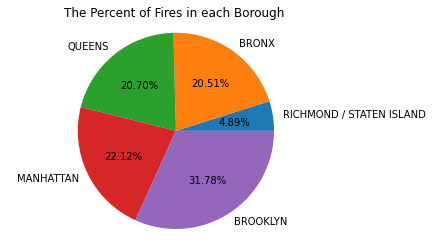

In [9]:
fig, ax = plt.subplots()       # initiate a figure 

ax.pie(x = Bcount.Count, labels = Bcount.Borough,
      autopct = '%1.2f%%')      # autopct shows the percentage of each slice 

ax.axis('equal')          # Equal aspect ratio ensures that pie is drawn as a circle.

ax.set_title('The Percent of Fires in each Borough')

### Numerical Variables <a id=2.2></a>

### Histograms<a id=2.2.1></a>

Histograms look very similar to bar graphs but they differ because histograms are only used for numerical data to demonstrate a frequency distribution, whereas bar graphs compare data.

For example, we will create a histogram that illustrates response time to fires in NYC.

#### Creating the histogram

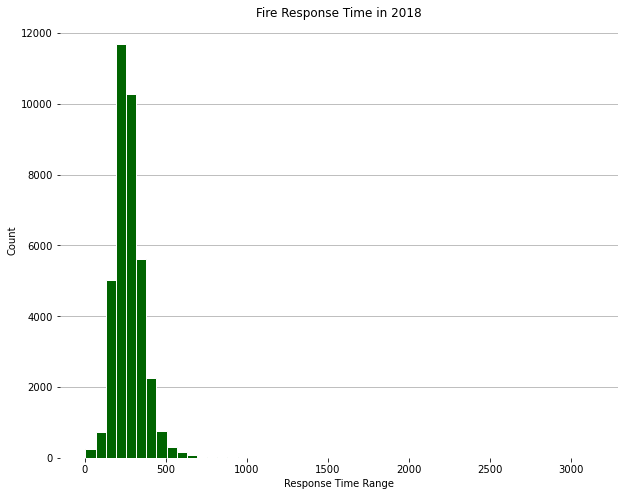

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))    

binwidth =10

ax.hist(Fire2018.ResponseTime, 
        bins=50, 
        color="darkgreen", 
        edgecolor='white', lw=1)

ax.set(xlabel='Response Time Range', ylabel='Count', title='Fire Response Time in 2018')


ax.grid(axis='y')           # show horizontal grid lines only
ax.set_axisbelow(True)      # show grid behind bins
plt.box(False)              # remove the frame

### Density Plots <a id=2.2.2></a>

Density plots are a variation of histograms that are useful for visualizing the underlying probability distribution. Unlike a histogram the y-axis of density plots represents the height of the curve (it's density), whereas the y-axis of a histogram denotes a count.

**Violin**and **box plots** are variations of histograms and density plots that can also be used. 

#### Creating the density plot

C:\Users\sarfa\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


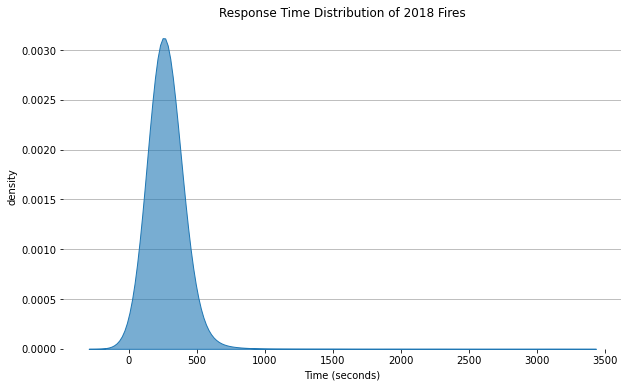

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))     # another way to work with Seaborn

sns.kdeplot(Fire2018.ResponseTime, ax=ax,                 # create `ax` with matplotlib, then draw plots on `ax` with seaborn
                     bw=1,                  # bandwidth
                     shade=True,            # fill the area under the density curve
                     alpha=0.6)             # transparency of the color
                                            # defult using a Guassian kernel       
## drop down to the matplotlib layer

ax.set_xlabel('Time (seconds)')
ax.set_ylabel('density')
ax.set_title('Response Time Distribution of 2018 Fires')

ax.grid(axis='y')           # show horizontal grid lines only
ax.set_axisbelow(True)      # show grid behind bins
plt.box(False)              # remove the frame

## Two or More Variables Visualization <a id=3></a>

### Categorical Variables <a id=3.1></a>

There are many visualization options for multiple categorical variables such as: **side by side graphs, grouped bar graphs, stacked bar graphs, mosaic plots, tree maps,** and **parallel sets**. 


### Side by Side Graphs<a id=3.1.1></a>

An alternate option for multiple categorical variables is a grouped bar graph.

In [12]:
# Getting the count of each incident by borough
Bincident = Fire2018.groupby(["Borough","IncidentType"])["Borough"].agg('count').to_frame('Count').reset_index()

#Bincident = Bincident.set_index('Borough')
#Bincident = Bincident.rename(index={'RICHMOND / STATEN ISLAND':'STATEN'})

Bincident['Borough'] = Bincident['Borough'].str.replace('RICHMOND / STATEN ISLAND', 'STATEN')


print (Bincident)

     Borough         IncidentType  Count
0      BRONX  NonStructural Fires   1770
1      BRONX     Structural Fires   5875
2   BROOKLYN  NonStructural Fires   3782
3   BROOKLYN     Structural Fires   8062
4  MANHATTAN  NonStructural Fires   2521
5  MANHATTAN     Structural Fires   5723
6     QUEENS  NonStructural Fires   2596
7     QUEENS     Structural Fires   5117
8     STATEN  NonStructural Fires    472
9     STATEN     Structural Fires   1350


#### Creating the side by side graph

Text(0.5, 0.98, 'Number of Covid19 Cases, by Country and by Type')

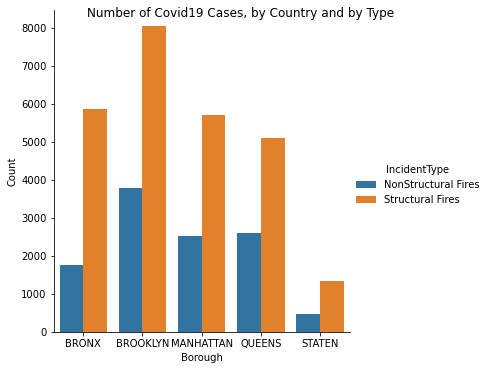

In [13]:
# Let's use seaborn for this

grouped = sns.catplot(data=Bincident, kind="bar", x="Borough", y="Count", hue="IncidentType")

grouped.set_axis_labels("Borough", "Count")                           # add labels
grouped.fig.suptitle('Number of Covid19 Cases, by Country and by Type')     # add title


### Numerical Variables <a id=3.2></a>
Numerical variables can be of two types. X-Y relationships and time series relationships.

There are many visualization options for X-Y relationships such as: **scatter plots** and **hexbins**.

For time series there are **line** and **area** graphs. 

### Scatter Plot <a id=3.2.1></a>
Scatter plots are useful to determine if two variables are related or when there is paired numerical data.

**Hexbins** are another type of graph that can be a useful way to maneuver overplotting in scatter plots. 

### Time Series<a id=3.2.2></a>

#### Creating the time series

Line graphs are often used to demonstrate time trends and are referred to as a "time series."
A time series is a sequence of data points plotted over time using lines, but can also consist of multiple data points. 

In this example, we will look at fire response time trends throughout the course of the year to see if the time it takes to respond to a fire throughout the five boroughs changes monthly. 

[Text(0, 0.5, 'Response Time'),
 Text(0.5, 1.0, 'Response Time by Borough in 2018')]

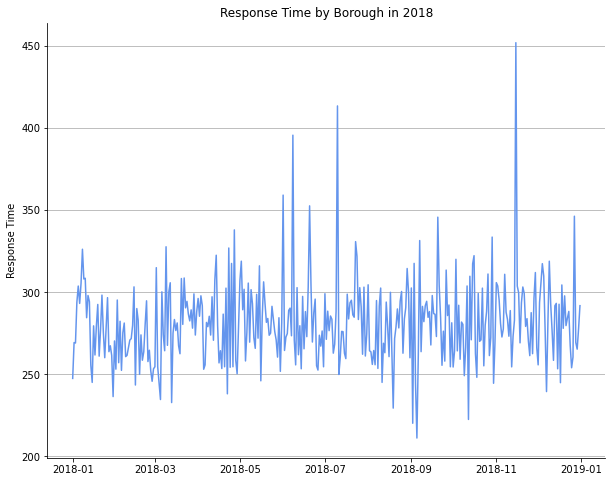

In [14]:
borough = Fire2018.groupby(['Date','Borough'])['ResponseTime'].mean()
borough = borough.reset_index()
borough.head()

# individual boroughs
Bronx = borough[(borough.Borough == 'BRONX')] 
Brooklyn = borough[(borough.Borough == 'BROOKLYN')] 
Manhattan = borough[(borough.Borough == 'MANHATTAN')] 
Queens = borough[(borough.Borough == 'QUEENS')] 

# Plot
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(Bronx.Date, Bronx.ResponseTime, color='cornflowerblue',label='Bronx')
#ax.plot(Brooklyn.Date, Brooklyn.ResponseTime, 'orange',label='Brooklyn')
#ax.plot(Manhattan.Date, Manhattan.ResponseTime, 'blue',label='Manhattan')
#ax.plot(Queens.Date, Queens.ResponseTime,  'green', label='Queens')

ax.spines['top'].set_visible(False)                    # remove top border
ax.spines['right'].set_visible(False)                  # remove right border

ax.grid(axis='y')                                      
ax.set_axisbelow(True)                                 

ax.set(ylabel='Response Time', title = 'Response Time by Borough in 2018')

### We can change the date format again here- Maybe go weekly? 

#### Creating an overlapping time series

Text(0.5, 1.0, 'Average response times per Borough (2018)')

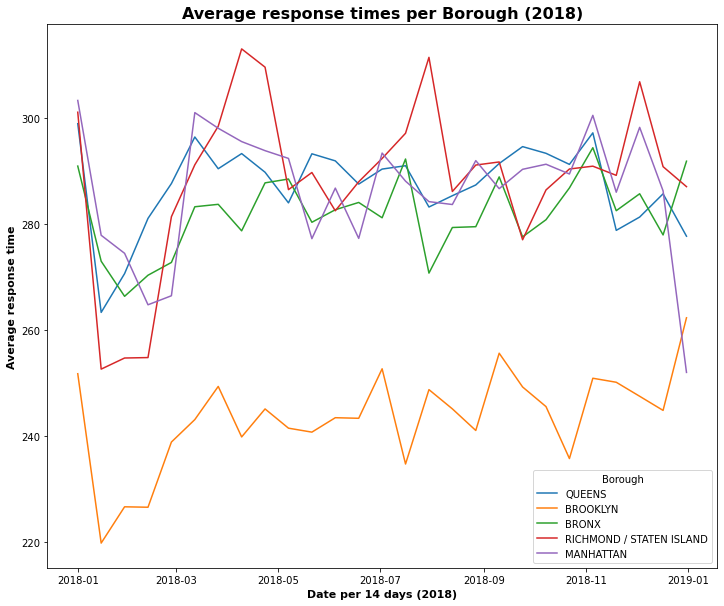

In [15]:
fire_resampled = []

for borough in Fire2018.Borough.unique():
    # Filter by borough
    temp = Fire2018[Fire2018.Borough == borough]
    # Resample the data by borough
    temp = temp.set_index("Date").resample("14d").mean()
    # Add back the borough column since we lose it via resampling
    temp["Borough"] = borough
    # Append resampled DataFrame to our list
    fire_resampled.append(temp)
    
# Finally, concat all DataFrames
fire_resampled = pd.concat(fire_resampled)

# Plot
fig_resamp, ax_resamp = plt.subplots(figsize=(12, 10))
sns.lineplot(x=fire_resampled.index, y="ResponseTime", hue="Borough", data=fire_resampled, ax=ax_resamp)
ax_resamp.set_xlabel("Date per 14 days (2018)", fontdict={"weight": "bold", "size": 11})
ax_resamp.set_ylabel("Average response time", fontdict={"weight": "bold", "size": 11})
ax_resamp.set_title("Average response times per Borough (2018)", fontdict={"weight": "bold",
                                                                               "size": 16})

### Categorical & Numerical Variables <a id=3.3></a>
Now we will look at how to visualize categorical and numerical variables together.

Some ways to do this are: **faceting** or **stacking and overlapping**.

### Faceting <a id=3.3.1></a>
Faceting is when there are multiple graphs side by side. Each of the panels would be organized by the categorical variable, for example: country name or gender.

This can be useful to visualize differences within a variable's categories.

#### Creating a faceted histogram plot

Text(0.5, 1.05, 'Response Time Distribution by Borough')

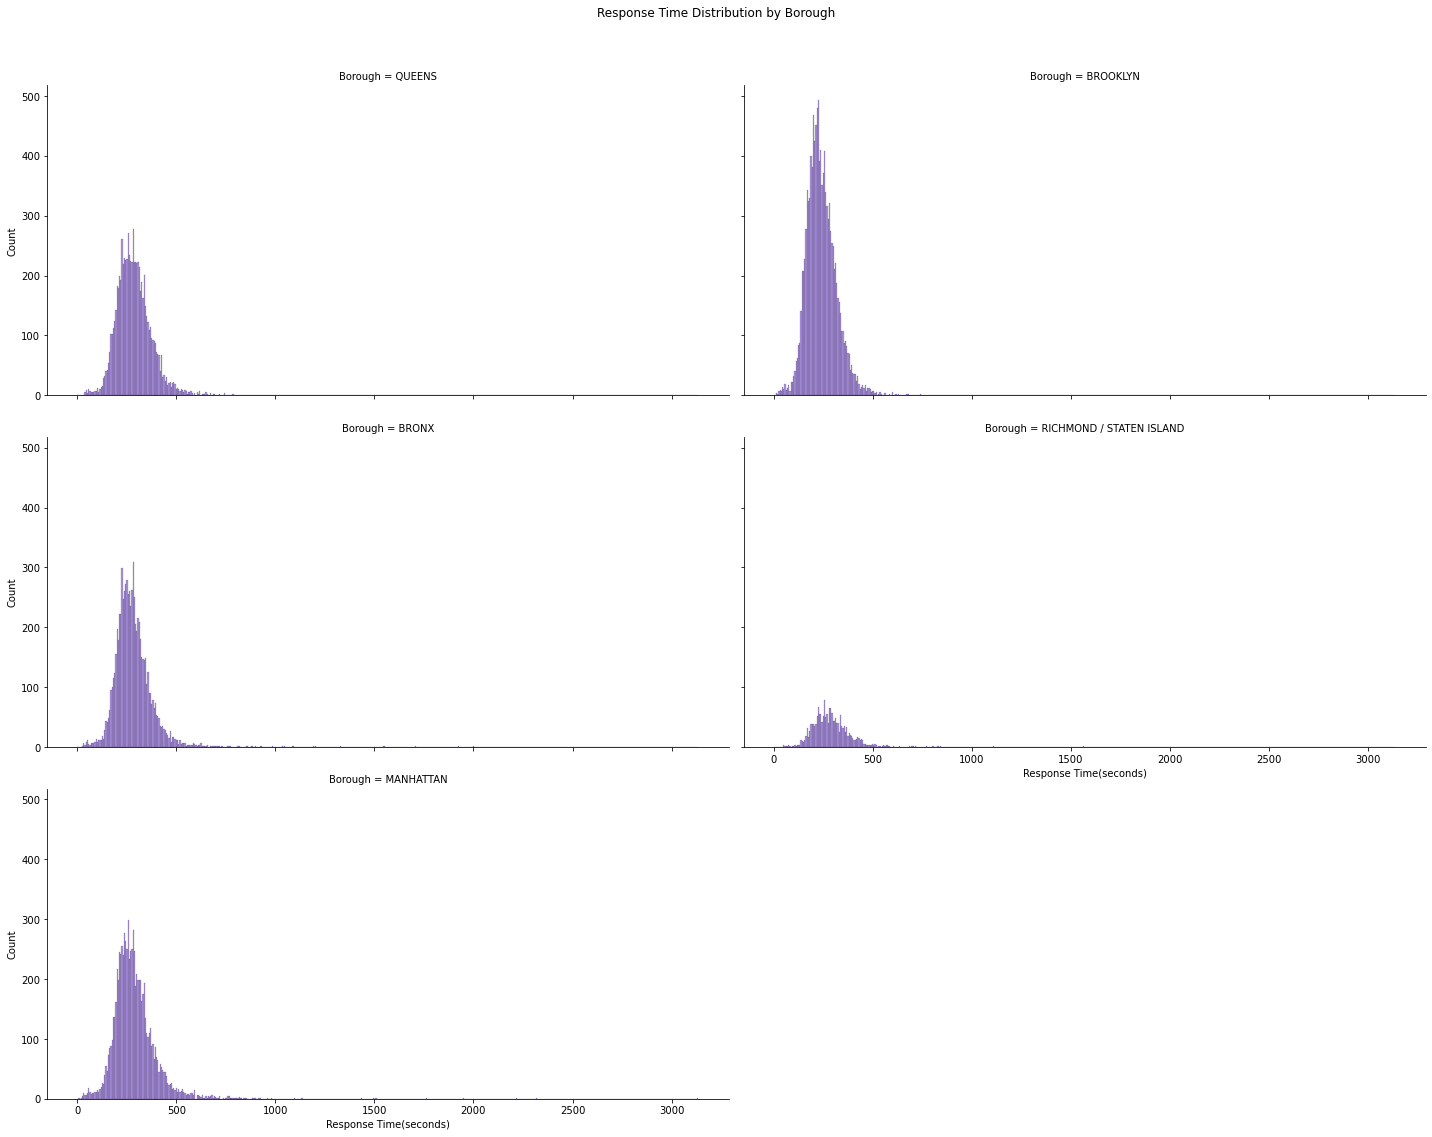

In [16]:
h = sns.displot(Fire2018,
           x = "ResponseTime", col = "Borough",
           col_wrap=2,
           aspect = 2, height = 5,
           color='mediumpurple')

h.set_axis_labels('Response Time(seconds)', 'Count')  
h.fig.suptitle('Response Time Distribution by Borough', y=1.05)

### Stacking & Overlapping <a id=3.3.2></a>

Stacking and overlapping is an alternative to faceting where we are able to collapse all the graphs into one instead of having multiple pannels. This may also be easier to make comparisons among the different graphs.

#### Creating a stacked violin plot

Text(0.5, 1.0, 'Response Time by Borough in 2018')

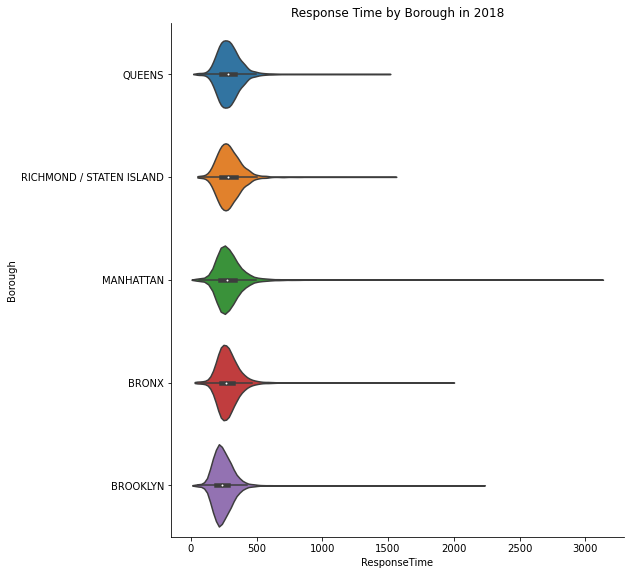

In [17]:
### Violin Plot to show Median Response Time Distribution

# Sort by highest median values
my_order = Fire2018.groupby(by=["Borough"])["ResponseTime"].median().sort_values(ascending=False).index


k = sns.catplot(x= "ResponseTime", y="Borough", 
                kind= 'violin',
                cut= 0, hue_order=True,
                data= Fire2018,
                order= my_order)

k.fig.set_figwidth(12)
k.fig.set_figheight(8)     

plt.title('Response Time by Borough in 2018')



# Using ggplot as an alternative to matplotlib and seaborn

ggplot2 is a popular data visualization tool that R programmers utilize to create beautiful graphs. However, ggplot is available in Python thanks to the  the package "plotnine". The advantages of using ggplot is that some find it much easier to plot and customize their graphs using ggplot rather than combining matplotlib and seaborn.
By assigning our ggplot as an object, it becomes more intuative to add customizations and set parameters for our plot. Let's try to plot a grouped bar chart using the Incident Type count by borough.

In [20]:
### Importing Packages
#from plotnine import ggplot, aes, geom_bar, ggtitle, theme, xlab, ylab

from plotnine import *

ModuleNotFoundError: No module named 'plotnine'

In [19]:
ourGG = ggplot(Bincident, aes(x='Borough', y='Count',fill='IncidentType'))\
+ geom_bar(stat='identity',position='dodge')

ourGG + ggtitle("Incident Types by Borough")


NameError: name 'ggplot' is not defined

While our plot was easy to plot, in the next section we can make our plot better by changing the parameters of the entire plot, leveraging the theme() function from ggplot. 

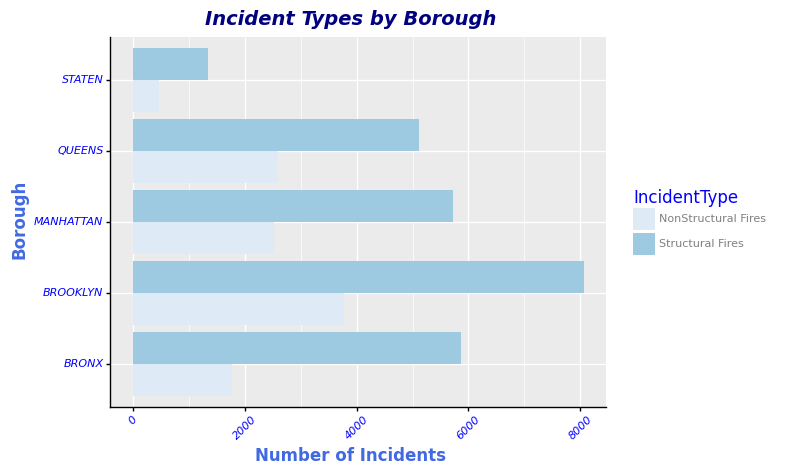

<ggplot: (8764125925352)>

In [12]:
ourGG + coord_flip() \
+ labs(title='Incident Types by Borough', x='Borough', y='Number of Incidents')\
+ theme(axis_text_x = element_text(face="italic", color="blue", size=8, angle=45),\
        axis_text_y = element_text(face="italic", color="blue", size=8, angle=0),\
        axis_line = element_line(colour = "black", size = 1, linetype = "solid"),\
        plot_title = element_text(color="Navy", size=14, face="bold.italic"),\
        axis_title_x = element_text(face="bold", color="royalblue", size=12),\
        axis_title_y = element_text(face="bold", color="royalblue", size=12),\
        legend_position = "right",\
        legend_title = element_text(color = "blue", size = 12),\
        legend_text = element_text(color = "grey",size=8))\
+ scale_fill_brewer(palette="Blues")

As we can see, we were able to take our original plot and flip the axis. From there, we added the labels for our axis and a title using the labs() function. From there, the theme() function gave us full control in how we wanted to present our plot by changing font and font size for all our labels, as well as the positions of our labels. We also changed the color scale of our plot using the scale_fill_brewer() function. Overall, ggplot allowed us to really take control of how we wanted to present our grouped bar graph.


<div class = "alert alert-info">
<b>Acknowledgement:</b> <br>
    
This Jupyter Notebook was created with use of course materials from DATA 790 with Professor Yinxian Zhang.
<br>
</div> 
